In [2]:
def base_url_se():
    # List of URL links
    urls = [
        "https://in.indeed.com/jobs?q=software+developer&l=Mumbai%2C+Maharashtra&from=searchOnDesktopSerp&vjk=cb692d426e5bf938",
        "https://in.indeed.com/jobs?q=software+developer&l=Hyderabad%2C+Telangana&from=searchOnDesktopSerp&vjk=8242bef427fca2bf",
        "https://in.indeed.com/jobs?q=web+developer&l=Bengaluru%2C+Karnataka&ts=1732161217679&from=searchOnDesktopSerp&rq=1&rsIdx=1&fromage=last&vjk=6c7c304af3d6fb1a",
        "https://in.indeed.com/jobs?q=web+developer&l=Chennai%2C+Tamil+Nadu&from=searchOnDesktopSerp&vjk=a7a5e9c06feab072",
        "https://in.indeed.com/jobs?q=data+analyst&l=Chennai%2C+Tamil+Nadu&ts=1731586147912&pts=1730116713697&from=searchOnDesktopSerp&rq=1&rsIdx=4&fromage=last&vjk=6eca67415bf43723"
    ]

    print("Available URLs:")
    for idx, url in enumerate(urls, start=1):
        print(f"{idx}. {url}")

    try:
        choice = int(input("\nSelect a URL by entering its number (1-5): "))
        if 1 <= choice <= len(urls):
            return urls[choice - 1]
        else:
            print("Invalid selection. Please run the program again and select a number between 1 and 5.")
            return None
    except ValueError:
        print("Invalid input. Please enter a number between 1 and 5.")
        return None


import time
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Function to set up the WebDriver
def setup_driver():
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    return driver

# Function to scrape job details
def scrape_jobs(base_url, pages, output_file):
    driver = setup_driver()
    all_jobs = []

    for page in range(0, pages * 10, 10):  # Each page increments by 10 in Indeed's pagination
        url = f"{base_url}&start={page}"
        print(f"Scraping page: {url}")
        driver.get(url)

        # Wait for the job cards to load
        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'job_seen_beacon'))
            )
        except Exception as e:
            print(f"Error loading page: {e}")
            continue

        # Parse the page with BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        job_cards = soup.find_all('div', class_='job_seen_beacon')

        # Fallback to alternative selector if no job cards are found
        if not job_cards:
            print("No job cards found with 'job_seen_beacon'. Skipping.")
            continue

        # Extract details from each job card
        for job in job_cards:
            try:
                # Extract Job Title
                title_element = job.find('h2', class_='jobTitle')
                title = title_element.text.strip() if title_element else 'N/A'

                # Extract Job Type (Full-time/Part-time)
                job_type_element = job.find('li', {'class': 'metadata css-1f4kgma eu4oa1w0'})
                job_type = job_type_element.find('div', {'data-testid': 'attribute_snippet_testid'}).text.strip() if job_type_element else 'Part-Time'

                # Extract Location
                location_element = job.find('div', {'data-testid': 'text-location'})
                location = location_element.text.strip() if location_element else 'N/A'

                # Extract Salary
                salary_element = job.find('div', class_='metadata salary-snippet-container css-1f4kgma eu4oa1w0')
                salary = salary_element.find('div', {'data-testid': 'attribute_snippet_testid'}).text.strip() if salary_element else 'N/A'

                # Extract Description
                description_element = job.find('ul')  # Extracting the list for job description
                description = description_element.text.strip() if description_element else 'No Description.'

                # Extract Job Link
                link_element = job.find('a', href=True)
                link = 'https://www.indeed.com' + link_element['href'] if link_element else 'N/A'

                # Add to jobs list
                all_jobs.append([title, job_type, location, salary, description, link])

            except Exception as e:
                print(f"Error processing job card: {e}")
                continue

    # Save to CSV
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Job Title', 'Job Type', 'Location', 'Salary', 'Description', 'Link'])
        writer.writerows(all_jobs)

    print(f"Job data has been saved to {output_file}")
    driver.quit()

# Main script
if __name__ == "__main__":
    print("Select the base URL:")
    base_url = base_url_se()  # Correct usage to get the selected URL
    if not base_url:
        print("No base URL selected. Exiting.")
        exit()
    pages = int(input("Enter the # of pages to scrape: ").strip())
    output_file = "jobs.csv"

    # Execute the scraper
    scrape_jobs(base_url, pages, output_file)


Select the base URL:
Available URLs:
1. https://in.indeed.com/jobs?q=software+developer&l=Mumbai%2C+Maharashtra&from=searchOnDesktopSerp&vjk=cb692d426e5bf938
2. https://in.indeed.com/jobs?q=software+developer&l=Hyderabad%2C+Telangana&from=searchOnDesktopSerp&vjk=8242bef427fca2bf
3. https://in.indeed.com/jobs?q=web+developer&l=Bengaluru%2C+Karnataka&ts=1732161217679&from=searchOnDesktopSerp&rq=1&rsIdx=1&fromage=last&vjk=6c7c304af3d6fb1a
4. https://in.indeed.com/jobs?q=web+developer&l=Chennai%2C+Tamil+Nadu&from=searchOnDesktopSerp&vjk=a7a5e9c06feab072
5. https://in.indeed.com/jobs?q=data+analyst&l=Chennai%2C+Tamil+Nadu&ts=1731586147912&pts=1730116713697&from=searchOnDesktopSerp&rq=1&rsIdx=4&fromage=last&vjk=6eca67415bf43723



Select a URL by entering its number (1-5):  3
Enter the # of pages to scrape:  3


Scraping page: https://in.indeed.com/jobs?q=web+developer&l=Bengaluru%2C+Karnataka&ts=1732161217679&from=searchOnDesktopSerp&rq=1&rsIdx=1&fromage=last&vjk=6c7c304af3d6fb1a&start=0
Scraping page: https://in.indeed.com/jobs?q=web+developer&l=Bengaluru%2C+Karnataka&ts=1732161217679&from=searchOnDesktopSerp&rq=1&rsIdx=1&fromage=last&vjk=6c7c304af3d6fb1a&start=10
Scraping page: https://in.indeed.com/jobs?q=web+developer&l=Bengaluru%2C+Karnataka&ts=1732161217679&from=searchOnDesktopSerp&rq=1&rsIdx=1&fromage=last&vjk=6c7c304af3d6fb1a&start=20
Job data has been saved to jobs.csv


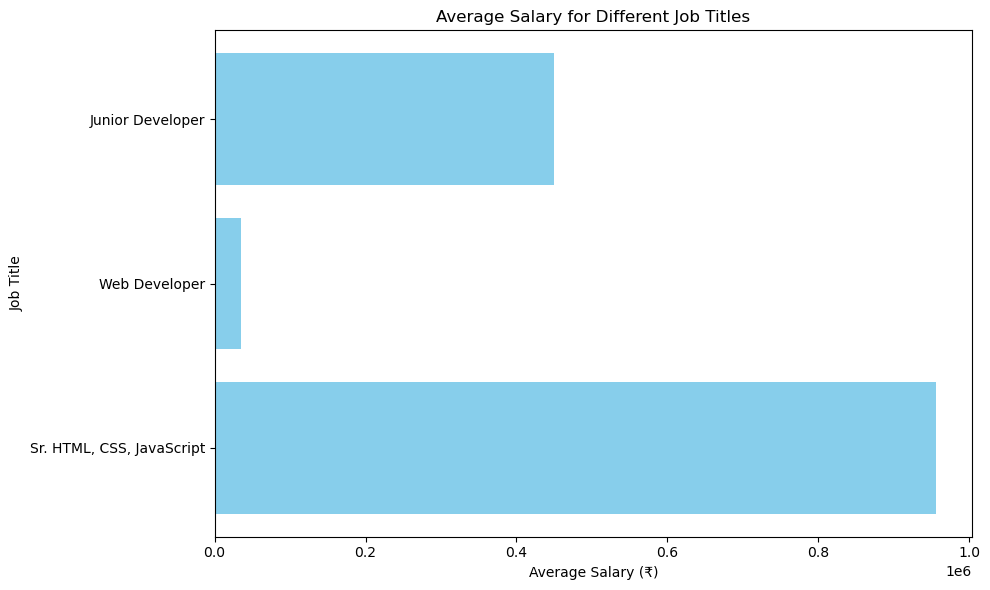

In [3]:
import csv
import matplotlib.pyplot as plt

# Function to parse salary and calculate average
def extract_average_salary(salary_range):
    try:
        # Remove currency symbol and commas
        salary_range = salary_range.replace('₹', '').replace(',', '').strip()

        # Check if the salary range contains a ' - ' (indicating a range)
        if ' - ' in salary_range:
            salary_split = salary_range.split(' - ')
            min_salary = float(salary_split[0].strip())  # Convert to float for ranges
            max_salary = float(salary_split[1].split()[0].strip())  # Split again to remove "a month"
            return (min_salary + max_salary) / 2
        elif 'From' in salary_range:  # For salary like "From ₹25,000 a month"
            return float(salary_range.replace('From', '').replace('₹', '').split()[0].strip())
        elif 'Up to' in salary_range:  # For salary like "Up to ₹8,000 a month"
            return float(salary_range.replace('Up to', '').replace('₹', '').split()[0].strip())
        else:
            # For exact salary values or unexpected formats
            return float(salary_range.split()[0].strip())  # Convert to float for single salary values
    except Exception as e:
        print(f"Error extracting salary: {e}")
        return 0

# Reading the CSV and processing salary data
job_titles = []
average_salaries = []

with open('jobs.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        title = row['Job Title']
        salary = row['Salary']
        if salary != 'N/A' and salary != '':  # Ensure we have a valid salary entry
            avg_salary = extract_average_salary(salary)
            job_titles.append(title)
            average_salaries.append(avg_salary)

# Create a bar chart to visualize the average salary per job title
plt.figure(figsize=(10, 6))
plt.barh(job_titles, average_salaries, color='skyblue')
plt.xlabel('Average Salary (₹)')
plt.ylabel('Job Title')
plt.title('Average Salary for Different Job Titles')
plt.tight_layout()

# Show the plot
plt.show()


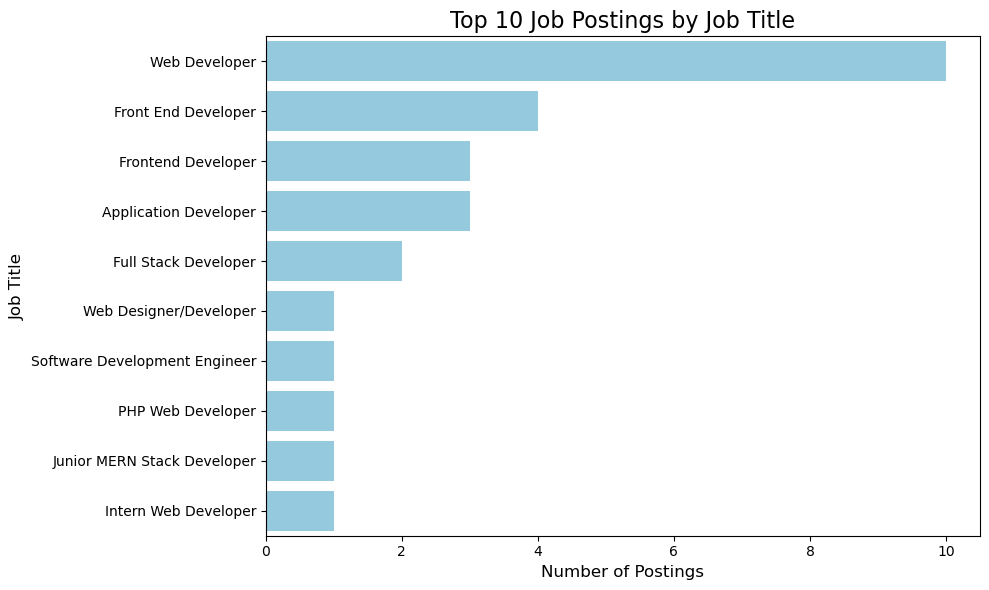

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv("jobs.csv")

# Count the number of postings for each Job Title
job_counts = data['Job Title'].value_counts().head(10)  # Display the top 10 job titles

# Create a bar graph for job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.values, y=job_counts.index, color='skyblue')  # Use a single color instead of palette
plt.title("Top 10 Job Postings by Job Title", fontsize=16)
plt.xlabel("Number of Postings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_8012\2216580945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.values, y=job_counts.index, palette="viridis")


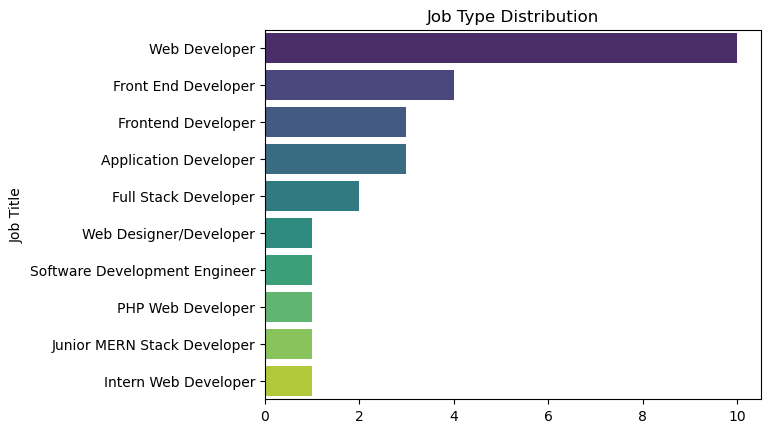

In [5]:
sns.barplot(x=job_counts.values, y=job_counts.index, palette="viridis")
plt.title("Job Type Distribution")
plt.show()
